In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
train_df = pd.read_csv("./Data/train_clean.csv")
valid_df = pd.read_csv("./Data/valid_clean.csv")

In [14]:
X_train = train_df.drop(columns=["ID", "Label"])
y_train = train_df["Label"]

X_valid = valid_df.drop(columns=["ID", "Label"])
y_valid = valid_df["Label"]

In [15]:
text_col = "Statement"
cat_cols = ["Party Affiliation", "Speaker Job Title", "State Info"]
num_cols = ["char_count", "word_count", "avg_word_length", "true_ratio", "false_ratio"]

In [16]:
text_transformer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

cat_transformer = OneHotEncoder(handle_unknown="ignore")

num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_col),
        ("cat", cat_transformer, cat_cols),
        ("num", num_transformer, num_cols)
    ]
)

In [17]:
gradient_boosting_model = Pipeline([
    ("preprocess", preprocessor),
    ("gb", GradientBoostingClassifier(
        n_estimators=150,          
        learning_rate=0.1,          
        max_depth=3,             
        min_samples_split=50,       
        min_samples_leaf=20,      
        subsample=0.7,             
        max_features=0.5, 
        random_state=42
    ))
])

In [ ]:
param_grid = {
    'gb__n_estimators': [100, 150, 200],
    'gb__learning_rate': [0.05, 0.1, 0.15],
    'gb__max_depth': [3, 4, 5],
    'gb__min_samples_split': [20, 30, 50],
    'gb__subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(
    gradient_boosting_model, 
    param_grid, 
    cv=3, 
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

In [ ]:
print("Training Gradient Boosting model...")
gradient_boosting_model.fit(X_train, y_train)
print("Training completed!")

Training Gradient Boosting model...
Training completed!


In [ ]:
y_train_pred = gradient_boosting_model.predict(X_train)

print("Training Results:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Results:
              precision    recall  f1-score   support

 barely-true       0.62      0.34      0.44      1654
       false       0.45      0.67      0.54      1995
   half-true       0.46      0.69      0.55      2114
 mostly-true       0.58      0.63      0.60      1962
  pants-fire       0.78      0.26      0.39       839
        true       0.68      0.31      0.43      1676

    accuracy                           0.52     10240
   macro avg       0.59      0.48      0.49     10240
weighted avg       0.57      0.52      0.51     10240

Training Accuracy: 0.52099609375


In [ ]:
y_valid_pred = gradient_boosting_model.predict(X_valid)

print("Validation Results:")
print(classification_report(y_valid, y_valid_pred))
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Macro F1 Score:", f1_score(y_valid, y_valid_pred, average='macro'))

Validation Results:
              precision    recall  f1-score   support

 barely-true       0.32      0.14      0.19       237
       false       0.32      0.49      0.39       263
   half-true       0.32      0.52      0.40       248
 mostly-true       0.47      0.48      0.48       251
  pants-fire       0.33      0.07      0.11       116
        true       0.26      0.14      0.18       169

    accuracy                           0.35      1284
   macro avg       0.34      0.31      0.29      1284
weighted avg       0.34      0.35      0.32      1284

Validation Accuracy: 0.34579439252336447
Macro F1 Score: 0.2906401643807656


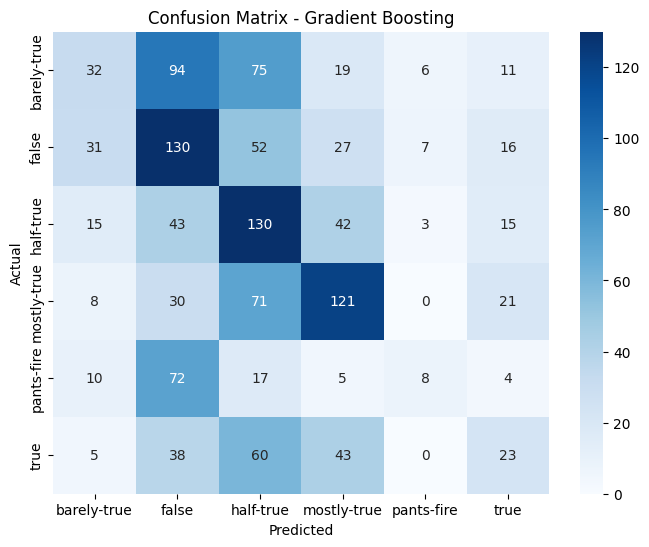

In [ ]:
cm = confusion_matrix(y_valid, y_valid_pred, labels=gradient_boosting_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

In [ ]:
print("\n=== MODEL SUMMARY ===")
print("Model: gradient_boosting")
print("Preprocessing: basic")
print("Vectorizer: tfidf_standard")
print("Training Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Validation Accuracy:", round(accuracy_score(y_valid, y_valid_pred), 4))
print("F1 Macro Score:", round(f1_score(y_valid, y_valid_pred, average='macro'), 4))


=== MODEL SUMMARY ===
Model: gradient_boosting
Preprocessing: basic
Vectorizer: tfidf_standard
Training Accuracy: 0.521
Validation Accuracy: 0.3458
F1 Macro Score: 0.2906
